In [1]:
# Importando as bibliotecas utilizadas no projeto
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando e visualizando os dados
dados = pd.read_csv('../Dados/Customer_Data.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Visualizando a quantidade de linhas e colunas presentes no Dataset
print('O Dataset possui %d linhas e %d colunas'%dados.shape)

O Dataset possui 8950 linhas e 18 colunas


In [4]:
# Obtendo informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Existem alguma colunas com dados faltantes.
dados.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Removendo essa colunas com dados faltantes
dados.dropna(inplace = True)
# Resetando o index
dados.reset_index(inplace = True, drop = True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

Antes de prosseguir para as próxima etapas, é importante compreender qual é a informação presente em cada coluna, por isso, segure abaixo um dicionário dos dados simplificado:

- **CUST_ID**: ID do cliente.
- **BALANCE**: Saldo devido pelo cliente.
- **BALANCE_FREQUENCY**: Frequência de atualização do saldo.
- **PURCHASES**: Total em compras.
- **ONEOFF_PURCHASES**: Compras à vista.
- **INSTALLMENTS_PURCHASES**: Compras parceladas.
- **CASH_ADVANCE**: Saques utilizando o cartão(Empréstimos).
- **PURCHASES_FREQUENCY**: Frequência de compras.
- **ONEOFF_PURCHASES_FREQUENCY**: Frequencia de compras à vista.
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequência de compras parcelada.
- **CASH_ADVANCE_FREQUENCY**: Frequência de realização dos saques.
- **CASH_ADVANCE_TRX**: Taxa de transações relacionadas aos saques.
- **PURCHASES_TRX**: Número de transações relacionadas a compra. 
- **CREDIT_LIMIT**: Limite do cartão de crédito.
- **PAYMENTS**: Valor do pagamento feito pelos clientes.
- **MINIMUM_PAYMENTS**: Valor mínimos dos pagamentos realizados pelo cliente.
- **PRC_FULL_PAYMENT**: Porcentagem de pagamentos totais feitos pelo cliente.
- **TENURE**: Tempo de contrato como cliente.

In [7]:
# Removendo as colunas Cust_id e Tenure 
dados = dados.drop(['CUST_ID', 'TENURE'], axis = 1)

In [8]:
# Importando e instanciando o StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Normalizando os dados.
dados_norm = scaler.fit_transform(dados)

In [9]:
# Rodando o KMeans para 4 clusters
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters= 4)
y_pred = kmeans.fit_predict(dados_norm)

labels = kmeans.labels_
silhouette = metrics.silhouette_score(dados_norm, labels, metric = 'euclidean')
dbs = metrics.davies_bouldin_score(dados_norm, labels)
calinski = metrics.calinski_harabasz_score(dados_norm, labels)
print(silhouette, dbs, calinski)

0.2155839424378504 1.4899963180613613 1688.550657903527


In [10]:
# Rodando o KMeans para 3 clusters
kmeans_3 = KMeans(n_clusters= 3)
y_pred = kmeans_3.fit_predict(dados_norm)

labels = kmeans_3.labels_
silhouette_3 = metrics.silhouette_score(dados_norm, labels, metric= 'euclidean')
dbs_3 = metrics.davies_bouldin_score(dados_norm,labels)
calinski_3 = metrics.calinski_harabasz_score(dados_norm, labels)
print(silhouette_3, dbs_3, calinski_3)

0.20246490916045862 1.6674836193934048 1644.6723588112666


In [11]:
# Rodando o KMeans para 5 clusters
kmeans_5 = KMeans(n_clusters= 5)
y_pred = kmeans_5.fit_predict(dados_norm)

labels = kmeans_5.labels_
silhouette_5 = metrics.silhouette_score(dados_norm, labels, metric= 'euclidean')
dbs_5 = metrics.davies_bouldin_score(dados_norm,labels)
calinski_5 = metrics.calinski_harabasz_score(dados_norm, labels)
print(silhouette_5, dbs_5, calinski_5)

0.21097587760282518 1.4750704457344024 1576.9967806534053


In [12]:
distortions = []
n_clusters = range(2,10)
for n_clust in n_clusters:
    print(n_clust)
    distortions.append(KMeans(n_clusters = n_clust, max_iter = 10_000, n_init = 100, random_state = 7).fit(dados_norm).inertia_)
    

2
3
4
5
6
7
8
9


In [13]:
distortions

[114698.51349039999,
 99579.79627619877,
 87075.86298934142,
 79831.2710779297,
 73173.19703936568,
 68220.58335622995,
 63716.3171537004,
 60338.497433008844]

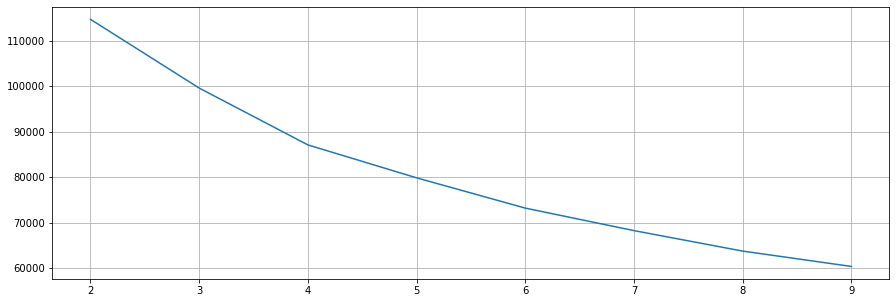

In [14]:
# Plotando o gráfico de cotovelo
plt.figure(figsize = (15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [15]:
def cluster(n_clusters, dataset):
  kmeans = KMeans(n_clusters= n_clusters, n_init = 10, max_iter = 300)
  y_pred = kmeans.fit_predict(dataset)

  #Calculando as métricas
  s = metrics.silhouette_score(dataset, y_pred, metric = 'euclidean')
  calinski = metrics.calinski_harabasz_score(dataset, y_pred)
  dbs = metrics.davies_bouldin_score(dataset, y_pred)
  return s, calinski, dbs

In [16]:
# Separando os dados para avaliar a estabilidade
set1, set2, set3 = np.array_split(dados_norm, 3)
s1, calinski1, dbs1 = cluster(4, set1)
s2, calinski2, dbs2 = cluster(4, set2)
s3, calinski3, dbs3 = cluster(4, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.2228060061289984 1.3842911550870243 640.6423128896387
0.21881269921329927 1.499763410138267 565.5243054917507
0.2331186595356879 1.3612067856819305 617.5530936618036


> Os valores encontrados após a separação dos dados em 3 grupos diferentes são bem próximos entre si, o que indica que existe um estabilidade com esse agrupamento(4 clusters). 

In [17]:
# Rodando o algorítmo com 4 clusters e atribuindo a variável X
n_kmeans = KMeans(n_clusters = 4, max_iter = 10_000, n_init = 100, random_state = 7)
X = n_kmeans.fit_predict(dados_norm)
X

array([3, 0, 1, ..., 1, 3, 3])

In [18]:
dados.insert(loc = 16, value = X, column = 'Cluster')
dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,3
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,1


## Interpretação dos clusters


Existe uma grande quantidade de atributos presentes neste dataset, entretanto, para que possamos ter uma boa ideia das características presentes em cada cluster, irei selecionar todos os atributos com a exceção do Minimum_Payment.

In [19]:
# Selecionando os centroides dos clusters
centroid = n_kmeans.cluster_centers_

# Selecionando os atributos
atributos = len(centroid[0])

# Criando o laço que calcula a variância 
for i in range(atributos):
    print(dados.columns.values[i],'\n%.4f'%centroid[:,i].var())

BALANCE 
0.5960
BALANCE_FREQUENCY 
0.1005
PURCHASES 
2.0760
ONEOFF_PURCHASES 
1.5607
INSTALLMENTS_PURCHASES 
1.2524
CASH_ADVANCE 
0.7053
PURCHASES_FREQUENCY 
0.7394
ONEOFF_PURCHASES_FREQUENCY 
0.7335
PURCHASES_INSTALLMENTS_FREQUENCY 
0.6096
CASH_ADVANCE_FREQUENCY 
0.7874
CASH_ADVANCE_TRX 
0.6445
PURCHASES_TRX 
1.9621
CREDIT_LIMIT 
0.5085
PAYMENTS 
0.7772
MINIMUM_PAYMENTS 
0.0888
PRC_FULL_PAYMENT 
0.1465


In [20]:
dados.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'Cluster'],
      dtype='object')

In [21]:
av = dados.groupby('Cluster')['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                              'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                              'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                              'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                              'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']
clientes = av.size()
av = av.mean()
av['n_clientes'] = clientes
av

C:\Users\MATEUS~1\AppData\Local\Temp/ipykernel_15248/2846061641.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  av = dados.groupby('Cluster')['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,n_clientes
Cluster,,,,,,,,,,,,,,,,
0,4670.638707,0.969581,506.268106,319.347228,187.009209,4592.258593,0.290530,0.139277,0.188675,0.487067,14.469157,7.765421,7673.809336,3567.050791,0.034727,1151
1,912.304871,0.945586,1268.165532,611.041375,657.405559,218.066382,0.887822,0.302086,0.714722,0.044114,0.819872,22.516001,4255.141802,1374.172916,0.274744,3281
2,3589.193728,0.987670,7843.311228,5228.017417,2616.828338,663.280441,0.945443,0.741297,0.786616,0.071375,2.115090,90.838875,9758.312020,7464.098243,0.291523,391
3,1063.631259,0.819535,274.153304,211.743666,62.688075,609.806379,0.174782,0.088363,0.082717,0.119352,2.215578,3.014949,3263.467960,1017.034790,0.084017,3813


### Esboço das características encontradas nos clusters

Cluster 0 - Possui a maior média de saldo devido, Gastam muito com saques(Adiantamento de dinheiro), em média tem em torno de 7x mais transações de saque que os demais, tem o segundo maior limite de crédito, não são tão bons pagadores

Cluster 1 - Possuem a menor média de saldo devido, Clientes que utilizam o cartão mais para compras, tem a segunda maior frequencia de compras, e compram mais parcelado,  Possui a menor número de transações de saque, são bons pagadores

Cluster 2 - Possuem a segunda maior média de saldo devido, Gastam muito com compras(disparadamente), são bons pagadores 

Cluster 3 - Possuem a segunda menor média de saldo devido, são os que menos gastam com compras, também não gastam muito com saques (adiantamentos), tem o menor limite, é o cluster mais populoso e não são tão bons pagadores.

# Conclusão


Após todo trabalhado realizado com os dados disponíveis chegamos a 4 grupos de clientes. O objetivo deste projeto era oferecer recomendações de produtos baseadas nas características dos grupos de clientes alvo.

Tendo como base as características mais acentuadas observadas em cada grupo, acredito que o objetivo tenha sido alcançado e por isso, abaixo seguem as recomendações por grupo:

O **primeiro grupo** se destaca por ser o que mais utiliza os **saques** que o cartão de credito oferece, com um número de transações sete vezes maior que os demais. Baseando-se nessa caracteristica, acredito que seria interessante recomendar-lhes um **empréstimo**, porém, é interessante observar o risco envolvido nessa recomendação visto que esse grupo apresentou **a menor média da porcentagem de pagamentos totais realizados**. 

O **segundo grupo** é composto pelos clientes que utilizam o cartão mais para realização de **compras parceladas**, não costumam utilizar tanto os saques, são bons pagadores, porém não possuem um limite de crédito tão alto. Por isso, com base nestas características, acredito que seria interessante oferece-lhes **um maior limite de crédito** para que possam comprar mais sem se preocupar tanto como o limite de crédito disponível. 

O **terceiro grupo** se destacou por ser os clientes que mais **utilizam o cartão para compras, tanto à vista quanto parceladas**, utilizam pouco os saques, tem o **maior limite de crédito** e, assim como o grupo anterior, também **são bons pagadores**. Talvez seja interessante oferecer outros produtos como **empréstimos** ou **criar incentivos para que estes clientes comecem a utilizar os saques**.

O **quarto grupo** é o que apresenta a maior quantidade de clientes, **são clientes que não costumam utilizar muito o cartão**, quando comparado com os demais grupos, apresentam baixas frequências de compras e saques, além do menor limite de crédito. Com base nessas características, talvez seja interessante ofertar-lhes **planos de poupanças e ou investimentos**.
